In [1]:
import pandas as pd
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from numpy.fft import *


# Lecture du fichier
#file_loc = r'C:\Users\Alexa\Downloads\Hg_lampe_2.xlsx'
file_loc = r'C:\Users\Alexa\Downloads\He-Ne_2.xlsx'
#file_loc = r'C:\Users\Alexa\Downloads\Hg_spectrum01_mod.xlsx'


df = pd.read_excel(file_loc)

# Selection des rangées
positions = df.iloc[18:130, 1].values # Position en microns
tensions = df.iloc[18:130, 2].values # Tension en mV

# Conversion en np.array

old_x = np.array(positions)
x = old_x - old_x[0]
y = np.abs(np.array(tensions))

# Création du tuple d'array
tuple_donnees = (x, y)

Fonction pour faire la FFT des données dans le domaine de l'espace. La fonction retourne les longueurs d'ondes, les fréquences ainsi que le spectre. 

In [2]:
def fourierTransformInterferogram(x, y):
    spectrum = fft(y)
    dx = x[1] - x[0]
    N = len(x)
    frequencies = fftfreq(N, dx)
    # Exclude the first frequency value (0) from the wavelengths calculation
    nonzero_indices = frequencies != 0
    frequencies = frequencies[nonzero_indices]
    wavelengths = 1 / frequencies
    # Add 0 as the first element of the wavelengths array
    wavelengths = np.insert(wavelengths, 0, 120)
    frequencies = np.insert(frequencies, 0, 0.00001)
    return (2*wavelengths, frequencies, spectrum)

Fonction qui met en graphique les données du spectre. Retourne rien du tout mais affiche un plot matplotlib

In [3]:
def plotCombinedFigures(x, y, w, s, title="", left=400, right=800):
    fig, (axes, axesFFT) = plt.subplots(2,1,figsize=(10, 7))
    axes.plot(x, y, '-')
    axes.set_title("Interferogramme")
    axesFFT.plot(w*1000, abs(s), 'o-')
    axesFFT.set_xlim(left=left, right=right)
    axesFFT.set_xlabel("Longueur d'onde [nm]")
    axesFFT.set_title(title)
    plt.show()

Code pour exécuter les fonctions.

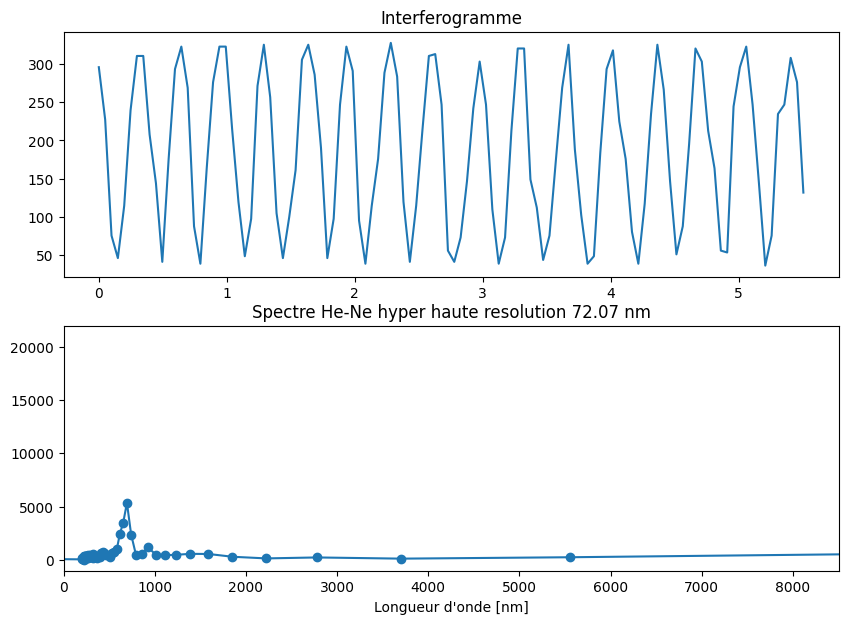

In [4]:
(w, f, s) = fourierTransformInterferogram(x, y)
df = f[1]-f[0]
dl = 0.6328*0.6328*df*1000
plotCombinedFigures(x,y,w,s,left=0, right=8500, title="Spectre He-Ne hyper haute resolution {0:0.2f} nm".format(dl))